In [1]:
allsentences = ['The HRDministry that the situation does not appear to be normal this semester in view of Covid-19, to maintain social distancing, safety, and health of the university students grades could be a composite of 50% marks on the basis of the pattern of internal evaluation adopted by the university and the remaining 50% marks on the basis of performance in the previous semester.',
                'USA, New York City high school students will have until January 2021 to complete any outstanding classwork during Covid-19, which includes remote term papers, presentations and exams. They will have the option to classify their courses on a pass/fail basis, which means their grades would not contribute to their GPA.',
                'Under the new system during Covid-19 in UK  university teachers and their heads of department, will be asked to grades and rank their students. It is felt that as teachers know their students best, this is the most fair and accurate way of evaluation of a students performance across the courses of their A-Levels.']

In [37]:
sentence1 = allsentences[0]
sentence1

'The HRDministry that the situation does not appear to be normal this semester in view of Covid-19, to maintain social distancing, safety, and health of the university students grades could be a composite of 50% marks on the basis of the pattern of internal evaluation adopted by the university and the remaining 50% marks on the basis of performance in the previous semester.'

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [39]:
wordcloud = WordCloud(width = 800, height = 400, background_color="white").generate(sentence1)

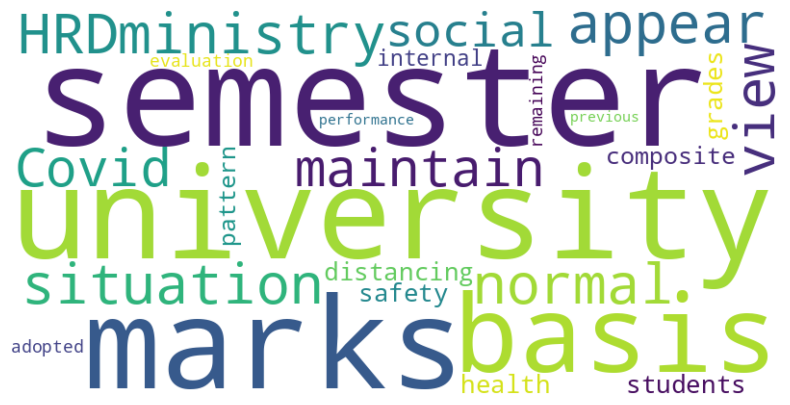

In [40]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
d = {
     'city':['hyderabad','hyderabad','mumbai','banglore','pune','mumbai','pune'],
     'size':['small','medium','large','medium','small','large','small'],
     'sales':[10000,20000,30000,40000,50000,60000,70000]
}

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(d)

In [20]:
df.head()

,city,size,sales
0,hyderabad,small,10000
1,hyderabad,medium,20000
2,mumbai,large,30000
3,banglore,medium,40000
4,pune,small,50000


In [21]:
df.city.unique()

array(['hyderabad', 'mumbai', 'banglore', 'pune'], dtype=object)

In [22]:
df.city.replace(['hyderabad', 'mumbai', 'banglore', 'pune'],[0,1,2,3]) #labelencoder

,city
0,0
1,0
2,1
3,2
4,3
5,1
6,3


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [25]:
ohe_trans = ohe.fit_transform(df[['city','size']])

In [26]:
ohe_trans

,city_banglore,city_hyderabad,city_mumbai,city_pune,size_large,size_medium,size_small
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
df = pd.concat([df,ohe_trans],axis=1).drop(['city','size'],axis=1)

In [28]:
df

,sales,city_banglore,city_hyderabad,city_mumbai,city_pune,size_large,size_medium,size_small
0,10000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,20000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,30000,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,40000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60000,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,70000,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [29]:
df.columns

Index(['sales', 'city_banglore', 'city_hyderabad', 'city_mumbai', 'city_pune',
       'size_large', 'size_medium', 'size_small'],
      dtype='object')

In [32]:
X = df[['city_banglore', 'city_hyderabad', 'city_mumbai', 'city_pune',
       'size_large', 'size_medium', 'size_small']]
y = df['sales']

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X,y)

LinearRegression()

In [36]:
lr.predict([[0.0	,1.0	,0.0	,0.0	,0.0	,0.0,	1.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10000.])